# 参考资料：
* http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
* http://pandas.pydata.org/pandas-docs/stable/reference/frame.html

* http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html



**Series和DataFrame的底层都是基于numpy的ndarray实现的！**

Series： One-dimensional ndarray with axis labels (including time series).

DataFrame: 可以看做是共享Index的一组Series。从这个角度讲，Series和DataFrame的操作都是相同的。对DataFrame操作相当于对一组Series进行批量操作。

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

# pd.set_option('display.max_rows', None)  # 显示所有行

# pandas
## 文件读取

pd.read_excel(converters={'出险人客户号': str})

* 【header】默认header=0，即将文件中的0行作为列名和数据的开头，但有时候0行的数据是无关的，我们想跳过0行，让1行作为数据的开头，可以通过将header设置为1来实现。
* 【usecols】根据列的位置或名字，如[0,1,2]或[‘a’, ‘b’, ‘c’]，选出特定的列。
* 【nrows】要导入的数据行数，在数据量很大、但只想导入其中一部分时使用。
* converters 指定某列读取时的类型

## 分类变量

In [211]:
pd.Categorical([1, 2, 3, 1, 2, 3])

[1, 2, 3, 1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [212]:
pd.Categorical([1, 2, 3, 1, 2, 3], categories=[1, 2])

[1, 2, NaN, 1, 2, NaN]
Categories (2, int64): [1, 2]

In [213]:
pd.Categorical(['a','b','c','a','b','c'], ordered=True, categories=['c', 'a', 'b'])

[a, b, c, a, b, c]
Categories (3, object): [c < a < b]

# Object Creation

## Series生成

### 基于list

In [7]:
s = pd.Series([1.1, 2, 3, None, 4, 5, 4, '2010-04-14'])
s

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [8]:
s.to_list()

[1.1, 2, 3, None, 4, 5, 4, '2010-04-14']

In [33]:
s.tolist()

[1.1, 2, 3, None, 4, 5, 4, '2010-04-14']

### 基于1D ndarray

In [10]:
s = pd.Series(np.arange(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [11]:
s.values

array([0, 1, 2, 3, 4])

### 基于dict

In [12]:
d = {'s': 0, 'b': 0, 'm': 0, 'e': 0}
s = pd.Series(d)
s

s    0
b    0
m    0
e    0
dtype: int64

In [13]:
s.to_dict()

{'s': 0, 'b': 0, 'm': 0, 'e': 0}

### Series属性

In [42]:
s.dtype

dtype('O')

In [43]:
s.dtypes

dtype('O')

In [44]:
s.ndim

1

In [45]:
s.shape

(8,)

In [47]:
s.size

8

In [49]:
s.count()  # Return number of non-NA/null observations in the Series.

7

In [46]:
s.name

In [52]:
s.empty

False

## DataFrame

### 基于list

In [109]:
pd.DataFrame([[0, 0], [0, 1], [1, 1]], columns=['x', 'y'])

,x,y
0,0,0
1,0,1
2,1,1


### 基于2D ndarray

In [16]:
pd.DataFrame(np.random.randn(6, 4), index=list('一二三四五六'), columns=list('ABCD'))

,A,B,C,D
一,0.283350,-1.240066,-0.122234,1.004819
二,1.447178,0.220691,0.280615,0.154684
三,-1.534464,-0.630083,-0.551958,1.368321
四,-0.904060,0.950741,-0.056634,0.312580
五,-1.130595,0.710522,-0.197247,-1.361997
六,1.780689,-1.491192,0.435972,-0.464831


### 基于dict

In [17]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### dataframe属性

In [18]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [19]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [20]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [21]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [22]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [25]:
df2.T

,0,1,2,3
A,1,1,1,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [139]:
df2.shape

(4, 6)

In [142]:
df2.size

24

In [143]:
len(df2)

4

## Index生成

### datetime index

In [14]:
pd.date_range('20130101', periods=6)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

# Viewing Data & Selection

## Series

In [129]:
s = pd.Series([1.1, 2, 0, None, 4, 5, 4, '2010-04-14'], index=list('abcdefgh'))
s

a           1.1
b             2
c             0
d          None
e             4
f             5
g             4
h    2010-04-14
dtype: object

In [60]:
s[:3]

a    1.1
b      2
c      0
dtype: object

In [61]:
s.iloc[1]

2

In [130]:
s.head()

a     1.1
b       2
c       0
d    None
e       4
dtype: object

### 随机采样

In [131]:
s.sample(2)

a    1.1
f      5
dtype: object

### 按照Index取值

In [62]:
s.loc['a']

1.1

In [63]:
s['a']

1.1

In [53]:
s[['a', 'e']]  # 可以按照给定的索引列表给值，很有用！

a    1.1
e      4
dtype: object

In [41]:
s.index[0]

'a'

### 获取非空值/空值

In [57]:
s[s.notnull()]

a           1.1
b             2
c             3
e             4
f             5
g             4
h    2010-04-14
dtype: object

In [58]:
s[s.isnull()]

d    None
dtype: object

### 获取非零值

In [64]:
s.nonzero()

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


(array([0, 1, 4, 5, 6, 7]),)

In [65]:
s[s.values.nonzero()[0]]  # 空值也不会返回

a           1.1
b             2
e             4
f             5
g             4
h    2010-04-14
dtype: object

### 按照条件取值

In [68]:
s = pd.Series(range(10))

In [69]:
s[s>3]

4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [72]:
s = pd.Series(range(10))
s.where(s>5, 0)

0    0
1    0
2    0
3    0
4    0
5    0
6    6
7    7
8    8
9    9
dtype: int64

In [73]:
s = pd.Series(range(10))
s.mask(s>5, 10)

0     0
1     1
2     2
3     3
4     4
5     5
6    10
7    10
8    10
9    10
dtype: int64

### 查找重复值

In [156]:
s = pd.Series([1, 3, 3, 4, 5, 2, 5])

In [77]:
s.duplicated()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
dtype: bool

In [78]:
s[s.duplicated()]

2    3
6    5
dtype: int64

In [80]:
#找出全部重复数据
s[s.isin(s[s.duplicated()].to_list())]

1    3
2    3
4    5
6    5
dtype: int64

In [157]:
s.drop_duplicates()

0    1
1    3
3    4
4    5
5    2
dtype: int64

### 遍历Series

In [192]:
s

0    1
1    3
2    3
3    4
4    5
5    2
6    5
dtype: int64

In [193]:
s.items()

In [194]:
for i, v in s.items():
    print(i, v)

0 1
1 3
2 3
3 4
4 5
5 2
6 5


## DataFrame

In [125]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
A    4 non-null float64
B    4 non-null datetime64[ns]
C    4 non-null float32
D    4 non-null int32
E    4 non-null category
F    4 non-null object
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 420.0+ bytes


In [127]:
df2.sample(2)

,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo


In [29]:
df2['A']

0    1.0
1    1.0
2    1.0
3    1.0
Name: A, dtype: float64

In [30]:
df2[:2]

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo


### 设置索引

In [114]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [115]:
df2.set_index('C')

,A,B,D,E,F
C,,,,,
1.0,1.0,2013-01-02,3,test,foo
1.0,1.0,2013-01-02,3,train,foo
1.0,1.0,2013-01-02,3,test,foo
1.0,1.0,2013-01-02,3,train,foo


### 修改列名和索引名

In [134]:
df2.rename(columns={'A': 'a'})

,a,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [135]:
df2.rename(index={2: 'aa'})

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
aa,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### 批量修改列名

In [137]:
df2.columns = list('abcdef')

In [138]:
df2

,a,b,c,d,e,f
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### 遍历DataFrame

In [195]:
df2

,letter,number
0,c,3
1,d,4


In [199]:
df2.itertuples()

In [197]:
list(df2.itertuples())

[Pandas(Index=0, letter='c', number=3), Pandas(Index=1, letter='d', number=4)]

In [198]:
df2.iteritems()

<generator object DataFrame.iteritems at 0x1307c24f8>

In [200]:
list(df2.iteritems())

[('letter', 0    c
  1    d
  Name: letter, dtype: object), ('number', 0    3
  1    4
  Name: number, dtype: int64)]

In [201]:
df2.iterrows()

<generator object DataFrame.iterrows at 0x1307c2048>

In [202]:
list(df2.iterrows())

[(0, letter    c
  number    3
  Name: 0, dtype: object), (1, letter    d
  number    4
  Name: 1, dtype: object)]

In [206]:
for line in df2.itertuples():
    print(line)
    print(line.letter)
    print(line['letter'])

Pandas(Index=0, letter='c', number=3)
c


TypeError: tuple indices must be integers or slices, not str

In [210]:
for line in df2.iteritems():
    print(line)
    print(type(line))
    print(line[1])
    break

('letter', 0    c
1    d
Name: letter, dtype: object)
<class 'tuple'>
0    c
1    d
Name: letter, dtype: object


# 排序

In [26]:
df2.sort_index(ascending=False)

,A,B,C,D,E,F
3,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
0,1.0,2013-01-02,1.0,3,test,foo


In [27]:
df2.sort_values(by='A')

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


# 合并
* concat
* merge
* join  和merge函数类似，只不过调用的主体是left_df

In [54]:
obj1 = pd.Series([1, 2])
obj2 = pd.Series([3, 4, 5])

In [55]:
obj1+obj2  #对应索引的值相加

0    4.0
1    6.0
2    NaN
dtype: float64

In [56]:
obj1.append(obj2)

0    1
1    2
0    3
1    4
2    5
dtype: int64

In [167]:
pd.concat([obj1, obj2], ignore_index=True)

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [168]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                   columns=['letter', 'number', 'animal'])

In [169]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [170]:
pd.concat([df1, df3])

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,animal,letter,number
0,NaN,a,1
1,NaN,b,2
0,cat,c,3
1,dog,d,4


In [172]:
pd.concat([df1, df3], sort=False)

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


In [173]:
pd.concat([df1, df3], sort=True)

,animal,letter,number
0,NaN,a,1
1,NaN,b,2
0,cat,c,3
1,dog,d,4


In [171]:
pd.concat([df1, df2], join='inner')

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [ ]:

pd.concat([df1, df3], sort=False)
  letter  number animal
0      a       1    NaN
1      b       2    NaN
0      c       3    cat
1      d       4    dog

In [ ]:
pd.concat()

# 计算+统计

In [110]:
s = pd.Series([1, 3, 3, 4, 5, 2, 5])
s.value_counts()

5    2
3    2
4    1
2    1
1    1
dtype: int64

## 描述性统计

In [111]:
s.describe()

count    7.000000
mean     3.285714
std      1.496026
min      1.000000
25%      2.500000
50%      3.000000
75%      4.500000
max      5.000000
dtype: float64

In [112]:
s.sum()

23

In [113]:
s.mode()  # 众数

0    3
1    5
dtype: int64

## 相关系数

In [149]:
df = pd.DataFrame({'收据号': [1, 1, 2, 3, 3, 3],
                   '费用': [1, 2, 3, 4, 5, 6],
                   'claim': [4, 4, 4, 5, 5, 5]})

In [150]:
df.corr()

,收据号,费用,claim
收据号,1.000000,0.924222,0.928477
费用,0.924222,1.000000,0.878310
claim,0.928477,0.878310,1.000000


In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

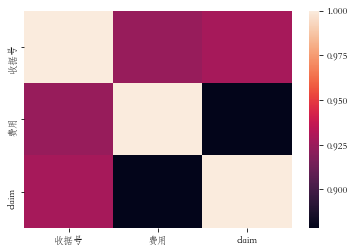

In [154]:
sns.heatmap(df.corr())

## 查找唯一值的个数

In [81]:
s.nunique()

5

In [82]:
s.nunique(dropna=False)  # 唯一值的数量, 把None也算作一个值

5

## groupby

内置聚合函数：
* mean()
* max()
* min()
* count()  # count只是单纯的计数，而不会管是否有重复值
* quantile(0.9)

自定义聚合函数：
```
def peak_to_peak(arr):
    return arr.max() - arr.min()
```

In [158]:
df = pd.DataFrame({'收据号': [1, 1, 2, 3, 3, 3],
                   '项目名称': ['挂号费', '药费', '挂号费', '挂号费', '治疗费', '床位费'],
                   '费用': [1, 2, 3, 4, 5, 6],
                   'claim': [4, 4, 4, 5, 5, 5]})

In [159]:
df.groupby('收据号')['费用'].sum()

收据号
1     3
2     3
3    15
Name: 费用, dtype: int64

### 自定义聚合函数

In [163]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [164]:
df.groupby('收据号')['费用'].agg(peak_to_peak)

收据号
1    1
2    0
3    2
Name: 费用, dtype: int64

### 多个列应用相同的聚合函数

In [160]:
df.groupby('收据号')['费用', 'claim'].sum()

,费用,claim
收据号,,
1,3,8
2,3,4
3,15,15


### 一个列应用多个聚合函数

In [165]:
df.groupby('收据号')['费用'].agg(['sum', 'mean', 'max', peak_to_peak])

,sum,mean,max,peak_to_peak
收据号,,,,
1,3,1.5,2,1
2,3,3.0,3,0
3,15,5.0,6,2


# 数据处理

## 缺失值处理

In [96]:
s

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [97]:
s.fillna('aaa')

0           1.1
1             2
2             3
3           aaa
4             4
5             5
6             4
7    2010-04-14
dtype: object

### 删除全部为null的列

In [ ]:
df2.dropna(axis=1, how='all')

### 删除全部为null的行

In [ ]:
df2.dropna(axis=0, how='all')

## 强制类型转换

In [83]:
s = pd.Series([1.1, 2, 3, None, 4, 5, 4, '2010-04-14'])

In [84]:
s.map(str)

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [85]:
s.astype(str)

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [87]:
s.iloc[0]

1.1

In [86]:
s.astype(str).iloc[0]

'1.1'

In [88]:
s.iloc[3]

In [89]:
s.astype(str).iloc[3]

'None'

In [95]:
s

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [94]:
s.astype('category')

0           1.1
1             2
2             3
3           NaN
4             4
5             5
6             4
7    2010-04-14
dtype: category
Categories (6, object): [1.1, 2, 3, 4, 5, 2010-04-14]

In [90]:
7 in s  # 是否在s的index中

True

## map & apply
对Series中的每一个元素进行处理，map用的更多一些

In [ ]:
df2.apply(func, axis=0)  ## apply function to each column.
df2.applymap(func)  # Apply a function to a Dataframe elementwise.

In [91]:
s.apply('I am a {}'.format)

0           I am a 1.1
1             I am a 2
2             I am a 3
3          I am a None
4             I am a 4
5             I am a 5
6             I am a 4
7    I am a 2010-04-14
dtype: object

In [92]:
s.map('I am a {}'.format)

0           I am a 1.1
1             I am a 2
2             I am a 3
3          I am a None
4             I am a 4
5             I am a 5
6             I am a 4
7    I am a 2010-04-14
dtype: object

In [93]:
s.map('I am a {}'.format, na_action='ignore')

0           I am a 1.1
1             I am a 2
2             I am a 3
3                 None
4             I am a 4
5             I am a 5
6             I am a 4
7    I am a 2010-04-14
dtype: object

## str
把 Series的每个元素看成一个list， 注意string可以看成是char list

然后运用string 和 list 的各种方法

In [98]:
s

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

In [99]:
s.str.len()

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7    10.0
dtype: float64

In [100]:
s.astype(str).str.len()

0     3
1     1
2     1
3     4
4     1
5     1
6     1
7    10
dtype: int64

In [101]:
s.astype(str).str.get(0)  # 如果字符串，就去第一个字符，如果列表就取第一个元素

0    1
1    2
2    3
3    N
4    4
5    5
6    4
7    2
dtype: object

In [102]:
s.astype(str).str.capitalize()

0           1.1
1             2
2             3
3          None
4             4
5             5
6             4
7    2010-04-14
dtype: object

## dt

In [116]:
s = pd.Series(pd.date_range('20130101', periods=6))
s

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-05
5   2013-01-06
dtype: datetime64[ns]

In [120]:
s.day

AttributeError: 'Series' object has no attribute 'day'

In [119]:
s.dt.day

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [121]:
s.map(str).dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [122]:
s.dt.week

0    1
1    1
2    1
3    1
4    1
5    1
dtype: int64

In [123]:
s.dt.weekday

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [124]:
s.dt.month

0    1
1    1
2    1
3    1
4    1
5    1
dtype: int64

## pivot

In [174]:
df = pd.DataFrame({'收据号': [1, 1, 2, 3, 3, 3],
                   '项目名称': ['挂号费', '药费', '挂号费', '挂号费', '治疗费', '床位费'],
                   '费用': [1, 2, 3, 4, 5, 6],
                   'claim': [4, 4, 4, 5, 5, 5]})
df

,收据号,项目名称,费用,claim
0,1,挂号费,1,4
1,1,药费,2,4
2,2,挂号费,3,4
3,3,挂号费,4,5
4,3,治疗费,5,5
5,3,床位费,6,5


In [148]:
df.pivot(index='收据号', columns='项目名称', values='费用').fillna(0)

项目名称,床位费,挂号费,治疗费,药费
收据号,,,,
1,0.0,1.0,0.0,2.0
2,0.0,3.0,0.0,0.0
3,6.0,4.0,5.0,0.0


In [176]:
pd.crosstab(df['收据号'], df['项目名称'], values=df['费用'], aggfunc=sum)

项目名称,床位费,挂号费,治疗费,药费
收据号,,,,
1,NaN,1.0,NaN,2.0
2,NaN,3.0,NaN,NaN
3,6.0,4.0,5.0,NaN


# plot

## Series

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

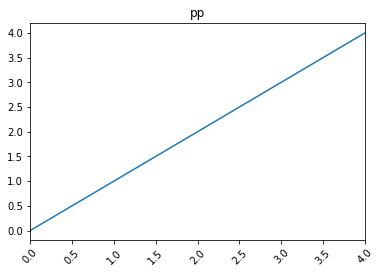

In [105]:
pd.Series(range(5)).plot(kind='line', title='pp', rot=45)

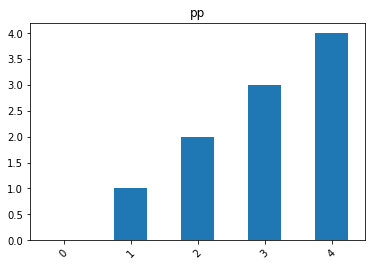

In [106]:
pd.Series(range(5)).plot(kind='bar', title='pp', rot=45)

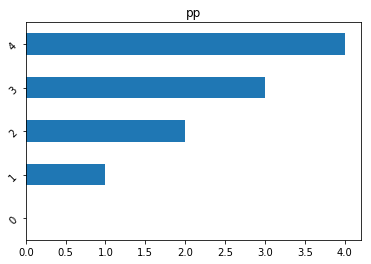

In [107]:
pd.Series(range(5)).plot(kind='barh', title='pp', rot=45)

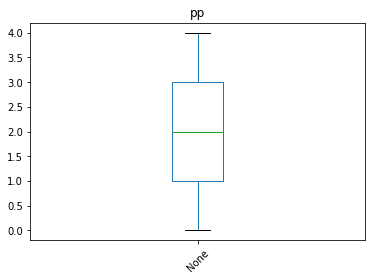

In [108]:
pd.Series(range(5)).plot(kind='box', title='pp', rot=45)

## DataFrame

In [179]:
df = pd.DataFrame({'收据号': [1, 1, 2, 3, 3, 3],
                   '项目名称': ['挂号费', '药费', '挂号费', '挂号费', '治疗费', '床位费'],
                   '费用': [1, 2, 3, 4, 5, 6],
                   'claim': [4, 4, 4, 5, 5, 5]})
df

,收据号,项目名称,费用,claim
0,1,挂号费,1,4
1,1,药费,2,4
2,2,挂号费,3,4
3,3,挂号费,4,5
4,3,治疗费,5,5
5,3,床位费,6,5


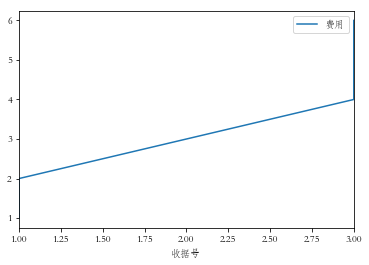

In [180]:
df.plot(kind='line', x='收据号', y='费用')

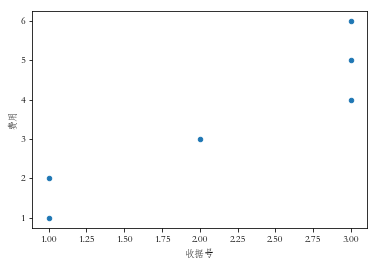

In [181]:
df.plot(kind='scatter', x='收据号', y='费用')

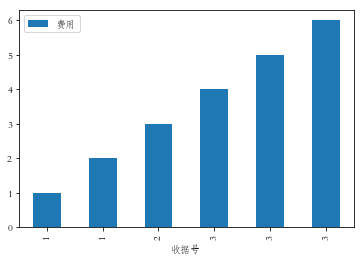

In [182]:
df.plot(kind='bar', x='收据号', y='费用')

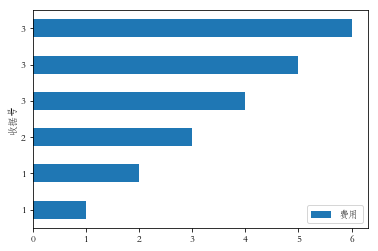

In [183]:
df.plot(kind='barh', x='收据号', y='费用')

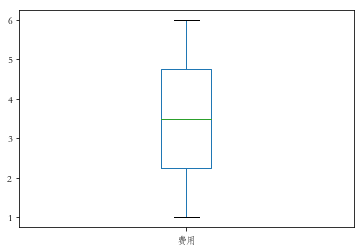

In [185]:
df.plot(kind='box', x='收据号', y='费用')

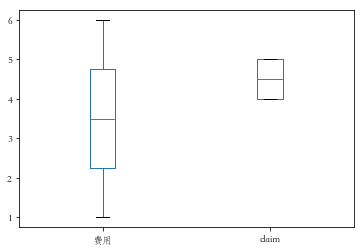

In [186]:
df.plot(kind='box', x='收据号')

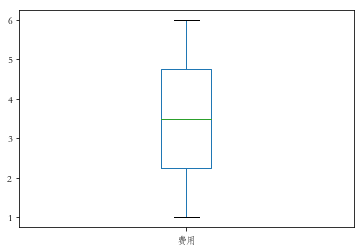

In [188]:
df.plot(kind='box', y='费用')

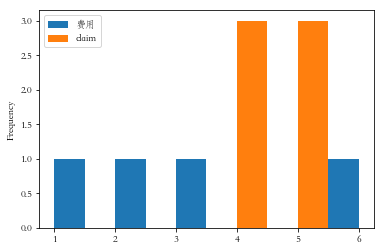

In [191]:
df.plot(kind='hist', x='收据号')